 Loading your friend's data into a dictionary

In [ ]:
#Creating the datasets for years and duration in a list
#years from 2011 to 2022
years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
#average movie durations
durations = ['103','101','99','100','95','95','96','93','90','102','90','100']

#create a dictionary with the two lists using the zip function
movie_dict = dict(zip(years, durations))

#print the dictionary
print(movie_dict)

Creating a dataframe from a dictionary

In [ ]:
import pandas as pd

#create a dataframe from the dictionary
durations_df =pd.DataFrame([movie_dict])

#print the dataFrame
print(durations_df)

 A visual inspection of our data using line plot

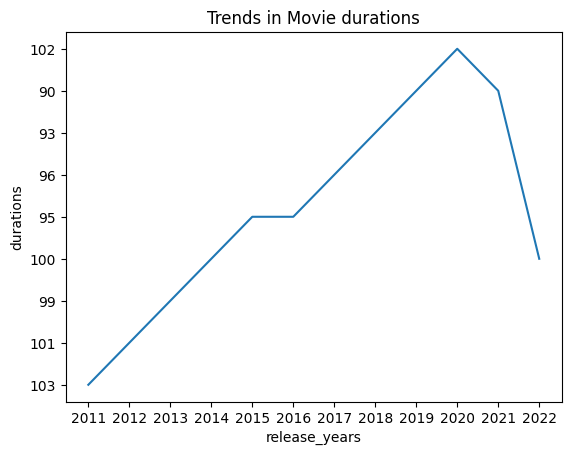

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()

#draw a line plot of release_years and durations
plt.plot(years, durations)
plt.xlabel("release_years")
plt.ylabel("durations")

#create a titile
plt.title("Trends in Movie durations")
plt.show()

Loading the rest of the data from a csv

In [20]:
#read in the csv as a df
netflix_df = pd.read_csv(r'netflix_data.csv')

# print the first 5 rows of the csv
print(netflix_df.head(5))

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

Filtering for Movies

In [31]:
#seeing that the dataframe also has some tv shows in the datasets, we will filter the datasets as the duration requires movies alone
#subset the df for type "Movie" in boolean condition
netflix_df_movies_only = (netflix_df['type'] == 'Movie')
#print(netflix_df[netflix_df_movies_only])

# Select only the columns of interest
netflix_movies_col_subset = netflix_df[netflix_df_movies_only]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head(6))



  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   
7      s8  Movie    187     Kevin Reynolds   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009 

Creating a scatter plot

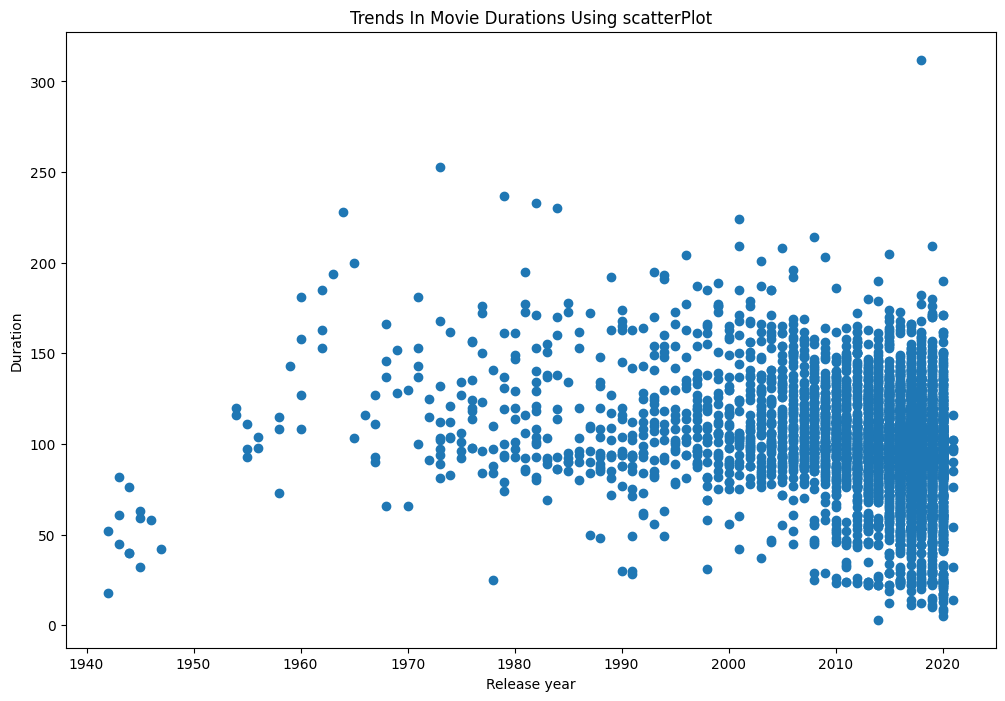

In [28]:
# Let's try visualizing the data again to inspect the data over a longer range of time
#This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead.

# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'])
plt.xlabel('Release year')
plt.ylabel('Duration')

# Create a title
plt.title("Trends In Movie Durations Using scatterPlot")

# show the plot
plt.show()

Digging deeper

In [33]:
# Filter for durations shorter than 60 minutes
short_movies = (netflix_movies_col_subset['duration'] <= 60)

sm = netflix_movies_col_subset[short_movies]

print(sm.head(20))

    show_id   type                                              title  \
35      s36  Movie                                          #Rucker50   
55      s56  Movie                100 Things to do Before High School   
67      s68  Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
101    s102  Movie                                  3 Seconds Divorce   
146    s147  Movie                                     A 3 Minute Hug   
162    s163  Movie  A Christmas Special: Miraculous: Tales of Lady...   
171    s172  Movie                         A Family Reunion Christmas   
177    s178  Movie                    A Go! Go! Cory Carson Christmas   
178    s179  Movie                    A Go! Go! Cory Carson Halloween   
179    s180  Movie                  A Go! Go! Cory Carson Summer Camp   
181    s182  Movie             A Grand Night In: The Story of Aardman   
200    s201  Movie                            A Love Song for Latasha   
220    s221  Movie                         A Russel

Marking non-feature films

In [40]:
#explore the effect of these genres on our data would be to plot them, but mark them with a different color.

#Define an empty list
colors = [ ]

# iterate over rows of netflix_movies_col_subset
for index, lab in netflix_movies_col_subset.iterrows():
    if lab['genre'] == 'Children':
        colors.append('red')
    elif lab['genre'] == 'Documentaries':
        colors.append('blue')
    elif lab['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')

print(colors)


['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'blue', 'blue', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red',

plotting with color

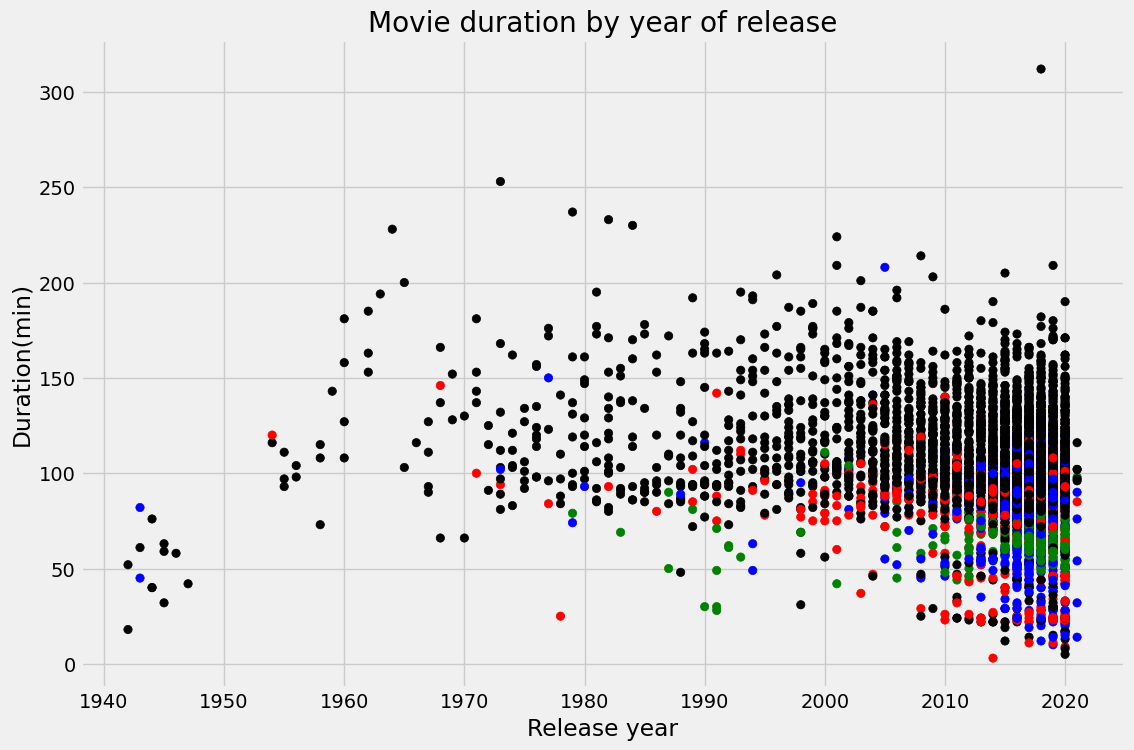

In [41]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c=colors)

# Create a title and axis labels

plt.xlabel('Release year')
plt.ylabel('Duration(min)')
plt.title("Movie duration by year of release")

# Show the plot
plt.show()